In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Fundings done in each year

2015 936
2016 993
2017 443


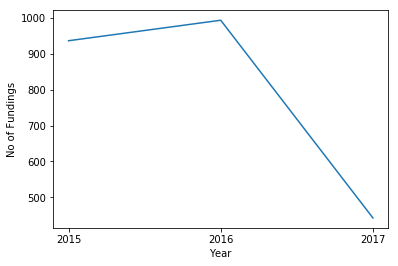

In [115]:
pd.options.mode.chained_assignment = None
with open("startup_funding.csv") as file_obj:
    reader = pd.read_csv(file_obj)
    date = reader["Date"]
    for i in range(len(date)):
        if "." in date[i]:
            date[i] = date[i].replace(".","/")
        if "//" in date[i]:
            date[i] = date[i].replace("//","/")
    year = date.str.split("/", expand = True)[2]
    

x = []
y = []
d = {}
count = year.value_counts()
for itr in count.iteritems():
    if(len(str(itr[1])) == 1):
        continue
    x.append(itr[0])
    d[itr[0]] = itr[1]
x.sort()
for i in x:
    y.append(d[i])
for i in range(0, 3):
    print(x[i], y[i])
plt.plot(x, y)
plt.xlabel("Year")
plt.ylabel("No of Fundings")
plt.show()

### Top 10 Cities with most number of startups

47


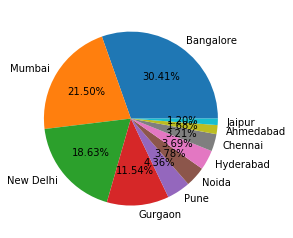

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [85]:
with open("startup_funding.csv") as file_obj:
    reader = pd.read_csv(file_obj)
    df = reader["CityLocation"]
df = df.dropna()
df = df.str.title()
# for itr in df.iteritems():
#     if("/" in itr[1]):
#         print(itr[1])
d = {}
for itr in df.iteritems():
    val = itr[1].rstrip()
    if("/" in itr[1]):
        val = val.split('/')[0].rstrip()
    if(val == "Delhi"):
        val = "New Delhi"
    if(val in d):
        d[val]+= 1
    else:
        d[val] = 1
s = {"Singapore", "Us", "Usa", "Sfo", 'London', 'Seattle', 'Boston', 'New York','Dallas'}
x = []
y = []
temp = {}
for i in d:
    if(i in s):
        continue
    y.append(d[i])
    temp[d[i]] = i

y.sort(reverse = True)
xf = []
yf = []
for i in range(0, 10):
    xf.append(temp[y[i]])
    yf.append(y[i])
plt.pie(yf, labels = xf, autopct = "%3.2f%%")
plt.show()
for i in range(0, 10):
    print(xf[i], yf[i])

### Top 10 cities in terms of fundings

In [116]:
from collections import Counter 
pd.options.mode.chained_assignment = None
with open("startup_funding.csv") as file_obj:
    reader = pd.read_csv(file_obj)
#     reader[['AmountInUSD']] = reader[['AmountInUSD']].fillna(value = 0)

reader = reader[pd.notna(reader['CityLocation'])]
reader = reader[pd.notna(reader['AmountInUSD'])]
def separateCity(city):
    return city.split('/')[0].strip()
reader['CityLocation'] = reader['CityLocation'].apply(separateCity)
reader['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
reader['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
# reader['AmountInUSD'].replace(",", "", inplace = True)
reader['AmountInUSD'] = reader['AmountInUSD'].str.replace(',', '')
# reader[['AmountInUSD']] = reader[['AmountInUSD']].fillna(value = 0)

df
d = {}
for index, row in reader.iterrows():
    val  = row['CityLocation']
    amount = int(row['AmountInUSD'])
    
    if(val in d):
        d[val] += amount
    else :
        d[val] = amount
k = Counter(d) 
high = k.most_common(10)
x = []
y = []
for i in high:
    x.append(i[0])
    y.append(i[1])
sums = sum(y)
for i in range(0, 10):
    
    val = (y[i]*100)/sums
    print(x[i], "%0.2f"%val)

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


### Types of Investments

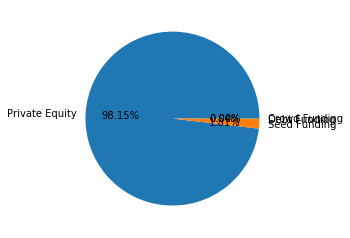

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [147]:
from collections import Counter 

with open("startup_funding.csv") as file_obj:
    reader = pd.read_csv(file_obj)
    reader = reader[pd.notna(reader['InvestmentType'])]
    reader = reader[pd.notna(reader['AmountInUSD'])]
    reader['AmountInUSD'] = reader['AmountInUSD'].str.replace(',', '')
    reader['InvestmentType'].replace("PrivateEquity", "Private Equity", inplace = True)
    reader['InvestmentType'].replace("SeedFunding", "Seed Funding", inplace = True)
    reader['InvestmentType'].replace("Crowd funding", "Crowd Funding", inplace = True)

    d = {}
    for index, row in reader.iterrows():
        key = row['InvestmentType']
        amount = int(row['AmountInUSD'])
        
        if(key in d):
            d[key] += amount
        else:
            d[key] = amount

k = Counter(d)
high = k.most_common(4) 
x = []
y = []
for i in high:
    x.append(i[0])
    y.append(i[1])
sums = sum(y)
plt.pie(y, labels = x, autopct = "%0.2f%%")
plt.show()
y = np.array(y)
y = (y*100)/sums
for i in range(4):
    print(x[i], "%0.2f"%y[i])

In [3]:
with open("startup_funding.csv") as file_obj:
    reader = pd.read_csv(file_obj)
    reader = reader[pd.notna(reader['IndustryVertical'])]
    
    reader['IndustryVertical'].replace("ECommerce","Ecommerce", inplace = True)
    reader['IndustryVertical'].replace("eCommerce","Ecommerce", inplace = True)
    reader['IndustryVertical'].replace("ECommerece","Ecommerce", inplace = True)
    reader['IndustryVertical'].replace("ecommerce","Ecommerce", inplace = True)
    reader['IndustryVertical'].replace("eCommerece","Ecommerce", inplace = True)
    reader = reader[pd.notna(reader['AmountInUSD'])]
    reader['AmountInUSD'] = reader['AmountInUSD'].str.replace(',', '')
    reader['AmountInUSD'] = pd.to_numeric(reader['AmountInUSD'])
    
    invest = reader.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)
    index= invest.index
    amount = invest.values
    sums = 0
    for i in range(5):
        sums += amount[i];
    amount = np.true_divide(amount, sums)*100
    for i in range(5):
        print(index[i], "%0.2f"%amount[i])

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


### Top 5 startups with most Fundings

In [13]:
with open("startup_funding.csv") as file_obj:
    reader = pd.read_csv(file_obj)
    reader = reader[pd.notna(reader['StartupName'])]
    reader = reader[pd.notna(reader['AmountInUSD'])]

    reader['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
    reader['StartupName'].replace("Ola Cabs", "Ola",inplace = True)
    reader['StartupName'].replace("Olacabs", "Ola",inplace = True)
    reader['StartupName'].replace("OYO Rooms", "Oyo",inplace = True)
    reader['StartupName'].replace("Oyo Rooms", "Oyo",inplace = True)
    reader['StartupName'].replace("OyoRooms", "Oyo",inplace = True)
    reader['StartupName'].replace("Oyorooms", "Oyo",inplace = True)
    reader['StartupName'].replace("Paytm Marketplace", "Paytm",inplace = True)
    
    reader['AmountInUSD'] = reader['AmountInUSD'].str.replace(',', '')
    reader['AmountInUSD'] = pd.to_numeric(reader['AmountInUSD'])
    
    invest = reader.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending = False)
    
    for i in range(5):
        print(invest.index[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


### Top 5 most funding rounds

In [20]:
with open("startup_funding.csv") as file_obj:
    reader = pd.read_csv(file_obj)
    reader = reader[pd.notna(reader['StartupName'])]

    reader['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
    reader['StartupName'].replace("Ola Cabs", "Ola",inplace = True)
    reader['StartupName'].replace("Olacabs", "Ola",inplace = True)
    reader['StartupName'].replace("OYO Rooms", "Oyo",inplace = True)
    reader['StartupName'].replace("Oyo Rooms", "Oyo",inplace = True)
    reader['StartupName'].replace("OyoRooms", "Oyo",inplace = True)
    reader['StartupName'].replace("Oyorooms", "Oyo",inplace = True)
    reader['StartupName'].replace("Paytm Marketplace", "Paytm",inplace = True)
    
    df = reader['StartupName'].value_counts()
    for i in range(5):
        print(df.index[i], df.values[i])

Ola 9
Swiggy 7
Oyo 6
Paytm 6
UrbanClap 6


### Top Investor

In [39]:
with open("startup_funding.csv") as file_obj:
    reader = pd.read_csv(file_obj)
    reader = reader[pd.notna(reader['InvestorsName'])]
    
    df = reader['InvestorsName']
    df.str.title()
    
    d = {}
    for row in df.iteritems():
        k = row[1].split(', ')
#         print(k)
        for i in k:
            if(i in d):
                d[i] += 1
            else :
                d[i] = 1

ans = -1
val = ""
for i in d:
    if(d[i] > ans):
        ans = d[i]
        val = i
print(val, ans)

Sequoia Capital 62
